In [1]:
!pip install -U scikit-learn

     |████████████████████████████████| 6.8MB 2.6MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [2]:
!pip install -U mlxtend

     |████████████████████████████████| 1.3MB 2.8MB/s 
  Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [3]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mutual_info_score
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import scale
from sklearn.utils import check_random_state
from sklearn.utils.fixes import _astype_copy_false
from sklearn.utils.validation import check_array, check_X_y
from sklearn.utils.validation import _deprecate_positional_args
from sklearn.utils.multiclass import check_classification_targets
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn import svm
from scipy import special, stats
from scipy.sparse import issparse
from sklearn.base import BaseEstimator
from sklearn.preprocessing import LabelBinarizer
from sklearn.utils import (as_float_array, check_array, check_X_y, safe_sqr,safe_mask)
from sklearn.utils.extmath import safe_sparse_dot, row_norms
from sklearn.utils.validation import check_is_fitted
from sklearn.utils.validation import _deprecate_positional_args
from sklearn.feature_selection._base import SelectorMixin
from sklearn.metrics import roc_auc_score
from scipy.sparse import issparse
from scipy.special import digamma
import scipy.stats as stats
from subprocess import check_output
#from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
#importing dataset
df = pd.read_csv('lung.tab', delimiter='\t')
df.shape

(191, 12601)

In [5]:
df.head()

,class,38691_s_at,37864_s_at,33273_f_at,33274_f_at,33501_r_at,33500_i_at,33499_s_at,41164_at,38194_s_at,37004_at,40808_at,41827_f_at,34105_f_at,41165_g_at,769_s_at,33699_at,31444_s_at,33383_f_at,37039_at,32052_at,32805_at,34301_r_at,33322_i_at,35566_f_at,35083_at,33377_at,34342_s_at,32252_at,36780_at,31687_f_at,37383_f_at,39248_at,34485_r_at,AFFX,35905_s_at,676_g_at,35530_f_at,39026_r_at,41237_at,...,31760_at,31880_at,38383_at,475_at,1245_i_at,34096_at,33793_at,37112_at,36258_at,37090_at,38879_at,41334_r_at,35681_r_at,876_at,34938_i_at,37524_at,AFFX-TrpnX-M_at,32037_r_at,32301_at,32075_at,38525_at,35894_at,35259_s_at,34544_at,39742_at,32083_at,AFFX-CreX-5_at,38911_at,33628_g_at,32012_at,41848_f_at,32086_at,33886_at,31781_at,AFFX-BioC-3_at,41422_at,39964_at,36120_at,40571_at,36312_at
0,discrete,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,...,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous
1,class,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AD,63.2,4196.25,3306.35,3330.86,1609.47,1597.32,1233.89,255.14,3036.53,8.92,16.21,1562.5,665.35,135.43,2397.58,98.89,2290.93,-4.03,1402.85,54.28,50.23,239.64,852.82,499.25,4182.14,-8.08,1887.45,0.01,559.25,114.31,4261.15,59.96,-414.3,2565.55,5090.71,4751.66,266.57,126.5,2528.43,...,-8.08,10.54,12.16,18.63,6.49,-2.41,-11.32,5.68,15.4,-9.7,-4.84,22.68,14.59,4.87,-6.46,4.87,-33.16,3.25,0.01,10.54,-5.65,-21.83,34.02,17.02,35.64,13.78,-22.64,6.49,-15.36,2.44,-17.79,18.63,51.04,-13.74,-29.12,-28.31,20.25,28.35,4.06,-19.41
3,AD,965.47,6207.61,7077.04,6968.59,6569.86,6419.19,6908.34,4785.76,4562.19,1120.1,31.42,4152.27,4600.01,3480.65,2534.08,84.5,2141,234.08,2577.81,67.52,1723.45,78.13,433.87,3352.11,4389.94,30.36,1061.32,18.68,894.66,32.48,3910.93,1808.95,14.43,2362.42,4509.08,3496.16,3523.09,-2.56,2127.27,...,0.63,21.86,11.24,22.92,17.61,0.63,-4.68,9.12,17.61,2.75,-1.5,20.8,20.8,18.68,-2.56,13.37,-7.87,14.43,10.18,26.11,13.37,9.12,27.17,22.92,27.17,20.8,-14.24,16.55,-6.81,11.24,-5.74,5.94,28.23,-4.68,-13.18,-13.18,21.86,9.12,11.24,8.06
4,AD,2940.51,6858.12,6927.79,6495.99,5273.47,4672.48,5474.67,2140.99,5120.39,1212.9,-0.195,3623.89,1533.9,1187.76,3105.11,65.925,2784.31,476.26,2471.1,216.965,2565.11,278.155,819.1,1030.22,4743.8,16.71,1553.85,-1.125,797.565,101.705,3264.08,2372.18,-67.92,1861.83,5321.86,3302.88,1185.65,17.02,2027.95,...,-10.695,11.57,2.92,0.885,-0.81,-3.16,-14.575,-1.575,10.745,-9.295,2.47,20.535,10.815,2.735,-3.475,7.61,-25.205,5.175,0.995,22.235,1.28,-15.93,9.96,6.71,26.31,8.32,-19.73,9.905,-2.915,-0.25,-17.225,4.725,17.28,-6.59,-17.97,-16.07,10.195,17.285,6.92,-11.09


In [6]:
df=df.dropna().loc[1:,:]

In [7]:
X = df.drop(['class '], axis=1)
X.head()

,38691_s_at,37864_s_at,33273_f_at,33274_f_at,33501_r_at,33500_i_at,33499_s_at,41164_at,38194_s_at,37004_at,40808_at,41827_f_at,34105_f_at,41165_g_at,769_s_at,33699_at,31444_s_at,33383_f_at,37039_at,32052_at,32805_at,34301_r_at,33322_i_at,35566_f_at,35083_at,33377_at,34342_s_at,32252_at,36780_at,31687_f_at,37383_f_at,39248_at,34485_r_at,AFFX,35905_s_at,676_g_at,35530_f_at,39026_r_at,41237_at,AFFX-HUMGAPDH/M33197_5_at,...,31760_at,31880_at,38383_at,475_at,1245_i_at,34096_at,33793_at,37112_at,36258_at,37090_at,38879_at,41334_r_at,35681_r_at,876_at,34938_i_at,37524_at,AFFX-TrpnX-M_at,32037_r_at,32301_at,32075_at,38525_at,35894_at,35259_s_at,34544_at,39742_at,32083_at,AFFX-CreX-5_at,38911_at,33628_g_at,32012_at,41848_f_at,32086_at,33886_at,31781_at,AFFX-BioC-3_at,41422_at,39964_at,36120_at,40571_at,36312_at
2,63.2,4196.25,3306.35,3330.86,1609.47,1597.32,1233.89,255.14,3036.53,8.92,16.21,1562.5,665.35,135.43,2397.58,98.89,2290.93,-4.03,1402.85,54.28,50.23,239.64,852.82,499.25,4182.14,-8.08,1887.45,0.01,559.25,114.31,4261.15,59.96,-414.3,2565.55,5090.71,4751.66,266.57,126.5,2528.43,2570.5,...,-8.08,10.54,12.16,18.63,6.49,-2.41,-11.32,5.68,15.4,-9.7,-4.84,22.68,14.59,4.87,-6.46,4.87,-33.16,3.25,0.01,10.54,-5.65,-21.83,34.02,17.02,35.64,13.78,-22.64,6.49,-15.36,2.44,-17.79,18.63,51.04,-13.74,-29.12,-28.31,20.25,28.35,4.06,-19.41
3,965.47,6207.61,7077.04,6968.59,6569.86,6419.19,6908.34,4785.76,4562.19,1120.1,31.42,4152.27,4600.01,3480.65,2534.08,84.5,2141,234.08,2577.81,67.52,1723.45,78.13,433.87,3352.11,4389.94,30.36,1061.32,18.68,894.66,32.48,3910.93,1808.95,14.43,2362.42,4509.08,3496.16,3523.09,-2.56,2127.27,2402.53,...,0.63,21.86,11.24,22.92,17.61,0.63,-4.68,9.12,17.61,2.75,-1.5,20.8,20.8,18.68,-2.56,13.37,-7.87,14.43,10.18,26.11,13.37,9.12,27.17,22.92,27.17,20.8,-14.24,16.55,-6.81,11.24,-5.74,5.94,28.23,-4.68,-13.18,-13.18,21.86,9.12,11.24,8.06
4,2940.51,6858.12,6927.79,6495.99,5273.47,4672.48,5474.67,2140.99,5120.39,1212.9,-0.195,3623.89,1533.9,1187.76,3105.11,65.925,2784.31,476.26,2471.1,216.965,2565.11,278.155,819.1,1030.22,4743.8,16.71,1553.85,-1.125,797.565,101.705,3264.08,2372.18,-67.92,1861.83,5321.86,3302.88,1185.65,17.02,2027.95,1594.8,...,-10.695,11.57,2.92,0.885,-0.81,-3.16,-14.575,-1.575,10.745,-9.295,2.47,20.535,10.815,2.735,-3.475,7.61,-25.205,5.175,0.995,22.235,1.28,-15.93,9.96,6.71,26.31,8.32,-19.73,9.905,-2.915,-0.25,-17.225,4.725,17.28,-6.59,-17.97,-16.07,10.195,17.285,6.92,-11.09
5,64.07,7016.91,7132.05,6983.44,6284.96,5504.68,6097.27,5885.41,5446.04,4422.72,-11.14,4812.18,3995.36,4282.76,2003.31,530.195,1914.52,1843.67,2398,251.77,392.635,186.3,804.645,3541.65,4335.57,34.69,880.48,-7.115,305.48,100.605,3880.54,926.18,-275.715,2340.89,5010.51,2895.65,4073.99,14.22,3546.41,1937.18,...,-10.9,18.805,16.37,36.22,10.455,2.435,-4.52,13.895,12.29,-5.52,-7.52,9.915,15.845,9.915,-5.065,18.285,-15.445,11.395,-6.01,28.765,1.49,0.95,26.325,18.905,29.67,17.875,-7.555,17.29,-20.015,8.415,-10.525,11.93,38.755,-5.005,-21.445,-24.335,14.355,39.2,12.335,7.41
6,3451.94,6281.06,6650.54,6858.68,6007.37,5517.95,5729.06,3245.64,5717.88,4116.73,-8.06,3387.26,3122.34,2268.38,2882.63,281.93,2860.16,1748.75,3219.15,314.15,30.42,41.56,785.17,2513.71,5308.86,11.18,542.78,-24.27,442.72,126.53,4939.59,605.62,365.43,2317.04,4614.94,3636.69,1939.55,0.04,3158.3,2503.9,...,-13.13,9.16,-1.98,21.31,-4.01,-4.01,-13.13,0.04,2.07,-4.01,-13.13,2.07,10.17,-6.03,-13.13,0.04,-25.28,-1.98,-1.98,7.13,0.04,-19.2,14.22,16.25,20.3,11.18,-30.35,-0.97,-6.03,-10.09,-11.1,-12.11,32.45,-16.17,-13.13,-18.19,11.18,14.22,5.11,-8.06


In [8]:
# Mapping genes into integers
y = df['class ']
y=y.map({'AD ': 1, 'NL ': 0,'SMCL ':2,'SQ ':3,'COID ':4})
y.head()

2    1
3    1
4    1
5    1
6    1
Name: class , dtype: int64

In [9]:
df.dtypes

class          object
38691_s_at     object
37864_s_at     object
33273_f_at     object
33274_f_at     object
                ...  
41422_at       object
39964_at       object
36120_at       object
40571_at       object
36312_at       object
Length: 12601, dtype: object

In [10]:
print(X.shape)
print(y.shape)

(188, 12600)
(188,)


In [11]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((150, 12600), (150,), (38, 12600), (38,))

Due to huge amount of time taken to train these models, I am assigning N=k_features=3.

## Task D.1: Classifying Data with Wrapper Model Sequential Forward Search

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
knn = KNeighborsClassifier(n_neighbors=3)
sfs1 = SFS(knn, 
           k_features=3, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=0)

sfs1 = sfs1.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 12600 out of 12600 | elapsed:  1.2min finished

[2020-10-16 18:39:03] Features: 1/3 -- score: 0.8933333333333333[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 12599 out of 12599 | elapsed:  1.2min finished

[2020-10-16 18:40:16] Features: 2/3 -- score: 0.96[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 12598 out of 12598 | elapsed:  1.2min finished

[2020-10-16 18:41:30] Features: 3/3 -- score: 0.9866666666666667

In [13]:
pd.DataFrame.from_dict(sfs1.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(1207,)",[0.8933333333333333],0.893333,"(1814_at ,)",NaN,0,NaN
2,"(1207, 2698)",[0.96],0.96,"(1814_at , 35669_at )",NaN,0,NaN
3,"(1207, 2698, 6692)",[0.9866666666666667],0.986667,"(1814_at , 35669_at , 34654_at )",NaN,0,NaN


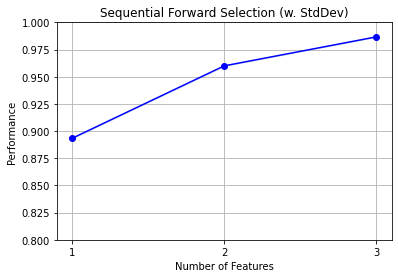

In [14]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
fig1 = plot_sfs(sfs1.get_metric_dict(), kind='std_dev')

plt.ylim([0.8, 1])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

## Task D.2: Classifying Data with Wrapper Model Sequential Backward Search

In [15]:
knn = KNeighborsClassifier(n_neighbors=3)
sbs1 = SFS(knn, 
           k_features=1060, 
           forward=False,#False for backward approach 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=0)

sbs1 = sbs1.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s

STOPPING EARLY DUE TO KEYBOARD INTERRUPT...

### Due to huge time taken, I have given Keyboard Interrupt to stop the job.

In [16]:
pd.DataFrame.from_dict(sbs1.get_metric_dict()).T

,avg_score,ci_bound,cv_scores,feature_idx,feature_names,std_dev,std_err
12600,0.953333,NaN,[0.9533333333333334],"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","(38691_s_at , 37864_s_at , 33273_f_at , 33274_...",0,NaN


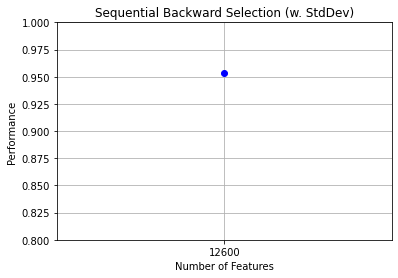

In [17]:
fig1 = plot_sfs(sbs1.get_metric_dict(), kind='std_dev')

plt.ylim([0.8, 1])
plt.title('Sequential Backward Selection (w. StdDev)')
plt.grid()
plt.show()

### End of All Tasks and Assignment